In [184]:
# In this cell we are going to read the data and run a general analysis.

# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read the data
df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

# Display and examine the data using different params for the head method e.g. head(10), head (50)
# Note alternatively we can use the print method instead of display, but the display method shows a better-styled output
display(df.head(10))

# Show some basic info about the data using the info method
# Note this will help us idenfify non-numeric data types and the number of rows with null/nan values for each column/var
print(df.info())



# Note about output:
# we have two float columns, 4 integer columns and 6 object columns

# with reference to the types of data in data science calssification, we have the following:
# Passengerid: categorical, nominal
# Survived: categorical, nominal
# Pclass: categorical, ordinal
# Name: categorical, nominal
# Sex: categorical, nominal
# Age: numeric, continous
# SibSp: numeric, discret
# Parch: numeric, discret
# Ticket: categorical, nominal
# Fare: numeric, numeric
# Cabin: categorical, nominal
# Embarked: categorical, nominal

# 3 columns have missing data: Age(177), Cabin(687), Embarked(2)




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
5,105,No,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
6,576,No,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
7,382,Yes,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
8,228,No,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
9,433,Yes,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.0000,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB
None


In [4]:
# In this cell we are going to deal with nan values in the data and run a general analysis.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

# We use the dropna method to remove rows containg null values for columns Age and Embarked
# the logic behind this decision is threefold:
# 1- The obvious reason is that age and embarked are assumed to be important data/variables for any data analysis/prediction
# and so we cannot elliminate the whole columns.
# 2- When we remove rows with null values we retain 712 rows of data which is quite a good amount of data for analysis, 
# considering its 80% of the original data.
# 3- predicitions for age will adversly affect the data and the data will loose its authenticity and therfor the outcome of 
# any analysis might loose its credibility and/or eefectivness.
newdf=df.dropna(subset=['Age','Embarked'])

# We remove the cabin column as i do not see any tangible usage for analysis.
# The following line will delete any column with nan values. Considering that we already removed roes with nan values 
# from the age and embarked columns then droping columns with nan values will remove the cabin column. BUT this is not 
# really the best way forward. It is safer that we use the drop method to make sure we explicitly specify the column to be
# droped. What if there is another column that contains only one nan value and we did not notice that? using dropna with
# axis = 1 , will drop this column as well.

# newdf=newdf.dropna(axis=1) 
newdf=newdf.drop(['Cabin'],axis=1) 

# Display the data to notice the changes
print(newdf.head(10).to_string())

# show the info of the newly created dataframe.
# Note the abcesne of null values.
# Note that for now the categorical columns/variables will not be converted. We will study their distrubuiots
# and afterthat - in the nest cells - we will convert them to numeric columns to study the correlation.
print(newdf.info())


   PassengerId Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch      Ticket     Fare Embarked
0          343       No       2                           Collander, Mr. Erik Gustaf    male  28.0      0      0      248740  13.0000        S
1           76       No       3                              Moen, Mr. Sigurd Hansen    male  25.0      0      0      348123   7.6500        S
2          641       No       3                               Jensen, Mr. Hans Peder    male  20.0      0      0      350050   7.8542        S
3          568       No       3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0      4      349909  21.0750        S
4          672       No       1                               Davidson, Mr. Thornton    male  31.0      1      0  F.C. 12750  52.0000        S
5          105       No       3                       Gustafsson, Mr. Anders Vilhelm    male  37.0      2      0     3101276   7.9250        S

In [6]:
# In this cell we are going to show the cantral tendency and dispersion measures which will help us understand the
# distribution of the data values within each columns/variables.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

# Note that pandas provide methods to calc mean, median and std but not mode. Mode was calc by the stats module from Scipy.
print ('Basic Stats about Fare' )
print ( stats.describe(newdf['Fare']))
print ('mean = ' + str(np.mean(newdf['Fare'])) + ' median = ' + str(np.median(newdf['Fare'])) +' mode: ' 
       + str(stats.mode(newdf['Fare'])) + ' std = ' + str(np.std(newdf['Fare'])))


print ('Basic Stats about Age' )
print ( stats.describe(newdf['Age']))
print ('mean = ' + str(np.mean(newdf['Age'])) + ' median = ' + str(np.median(newdf['Age'])) +' mode: ' 
       + str(stats.mode(newdf['Age'])) + ' std = ' + str(np.std(newdf['Age'])))

print ('Basic Stats about Pclass' )
print ( stats.describe(newdf['Pclass']))
print ('mean = ' + str(np.mean(newdf['Pclass'])) + ' median = ' + str(np.median(newdf['Pclass'])) +' mode: ' 
       + str(stats.mode(newdf['Pclass'])) + ' std = ' + str(np.std(newdf['Pclass'])))

print ('Basic Stats about SibSp' )
print ( stats.describe(newdf['SibSp']))
print ('mean = ' + str(np.mean(newdf['SibSp'])) + ' median = ' + str(np.median(newdf['SibSp'])) +' mode: ' 
       + str(stats.mode(newdf['SibSp'])) + ' std = ' + str(np.std(newdf['SibSp'])))

print ('Basic Stats about Parch' )
print ( stats.describe(newdf['Parch']))
print ('mean = ' + str(np.mean(newdf['Parch'])) + ' median = ' + str(np.median(newdf['Parch'])) +' mode: ' 
       + str(stats.mode(newdf['Parch'])) + ' std = ' + str(np.std(newdf['Parch'])))

# print ('Basic Stats about Sex' )
# print ( stats.describe(newdf['Sex']))
# # print ('mean = ' + str(np.mean(newdf['Sex'])) + ' median = ' + str(np.median(newdf['Sex'])) +' mode: ' 
# #        + str(stats.mode(newdf['Sex'])) + ' std = ' + str(np.std(newdf['Sex'])))

# print ('Basic Stats about Survived' )
# print ( stats.describe(newdf['Survived']))
# # print ('mean = ' + str(np.mean(newdf['Survived'])) + ' median = ' + str(np.median(newdf['Survived'])) +' mode: ' 
# #        + str(stats.mode(newdf['Survived'])) + ' std = ' + str(np.std(newdf['Survived'])))

# print ('Basic Stats about Embarked' )
# print ( stats.describe(newdf['Embarked']))
# # print ('mean = ' + str(np.mean(newdf['Embarked'])) + ' median = ' + str(np.median(newdf['Embarked'])) +' mode: ' 
# #        + str(stats.mode(newdf['Embarked'])) + ' std = ' + str(np.std(newdf['Embarked'])))

# Notes about the Fare column/var:

# 1- The min fare was zero. So if this is not errors in the dataset, then some people were alloed to borad ship for free.
# Maybe the crew members were the ones with zero fare.
# 2- The maximum fare was around 500 pounds (in 1912). This is the equivelent of 39086 pounds today, which is approx.
# 20571 BD! so that is quite expensive.
# 3- The mean was approx. 34 pounds. We can already see how far the maximum fare from the mean.
# 4- "Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
# The mode marks the response value on the x-axis that occurs with the highest probability. A distribution is skewed if the
# tail on one side of the mode is fatter or longer than on the other: it is asymmetrical.
# In an asymmetrical distribution a negative skew indicates that the tail on the left side is longer than on the 
# right side (left-skewed), conversely a positive skew indicates the tail on the right side is longer than on the left 
# (right-skewed). Asymmetric distributions occur when extreme values lead to a distortion of the normal distribution."
# (n.d., Statistica, https://www.statista.com/statistics-glossary/definition/390/skewness/)
# "The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. 
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less 
# than -1 or greater than 1, the data are highly skewed." 
# (2016, spcforexcel, https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics)
# Based on the above it semms that the distribution of Fare is sigificantly skewed with a longer right tail. It follows
# that this distribution contains extremely large fare prices.
# 5- Note how the mdeian is lower than the mean.
# 6- Most people paid around 13 pounds.
# 7- Note how the std is quite high. This means that the data values are on average 50 units away from the mean.

# Notes about the Age column/var:
# 1- Note the min value of 0.42 indicating the existence of less than 6-months baby(ies). Also the oldest passengger was 80.
# 2- On average the passenger on the Titanic was only 30 years old.
# 3- Note how the skewness is small indicating that the data distribution is normal.
# 4- The fact the distribution is normal is suppoerted by the closeness between the mean and median.
# 5- most perople were approx. 24.
# 6- The std is quite small suggesting that most people (around 68%) are between 15 and 45 years old.

# Notes about the Pclass column/var:
# 1- The small skewness suggests a normal distribution where most people are at the 2nd class places and the rest almost 
# equally divided between 1st and 3rd classes.

# Notes about the SibSp column/var:
# 1- The person with largest members of siblings and spouses had 5 persons. It seems that this is a kid with five siblings.
# 2- the minimum of zero refers to either kids with no siblings or persons with no spouse or sibilings.

# Notes about the Parch column/var:
# 1- The min value of zero refere to people with no kids or parent along with them. 
# 2- A max value of 6 refere to either a person with 6 kids and no parents or a person with a combination of paernts and 
# kids that add up to six persons.






Basic Stats about Fare
DescribeResult(nobs=712, minmax=(0.0, 512.3292), mean=34.567251404494385, variance=2802.5004705658207, skewness=4.657170812752333, kurtosis=30.787598623765568)
mean = 34.56725140449437 median = 15.64585 mode: ModeResult(mode=array([13.]), count=array([41])) std = 52.901459095182794
Basic Stats about Age
DescribeResult(nobs=712, minmax=(0.42, 80.0), mean=29.64209269662921, variance=210.04510405327994, skewness=0.38806086699657316, kurtosis=0.1782163732904034)
mean = 29.64209269662921 median = 28.0 mode: ModeResult(mode=array([24.]), count=array([30])) std = 14.48275170278997
Basic Stats about Pclass
DescribeResult(nobs=712, minmax=(1, 3), mean=2.240168539325843, variance=0.7003251473632642, skewness=-0.47460174118915177, kurtosis=-1.4086156092671969)
mean = 2.240168539325843 median = 2.0 mode: ModeResult(mode=array([3], dtype=int64), count=array([355])) std = 0.8362664316043114
Basic Stats about SibSp
DescribeResult(nobs=712, minmax=(0, 5), mean=0.5140449438202247

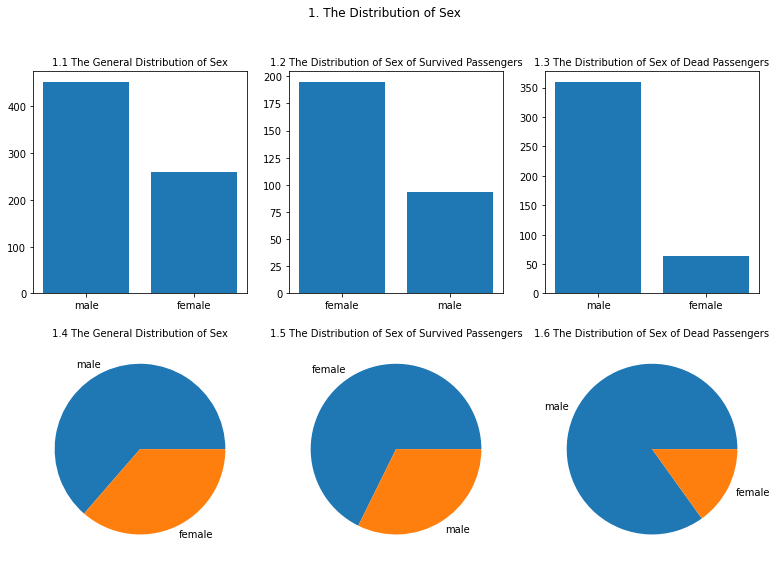

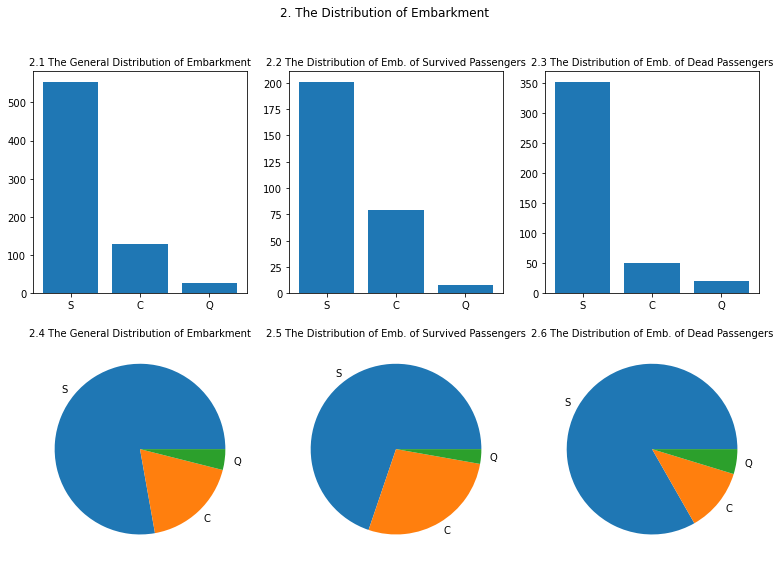

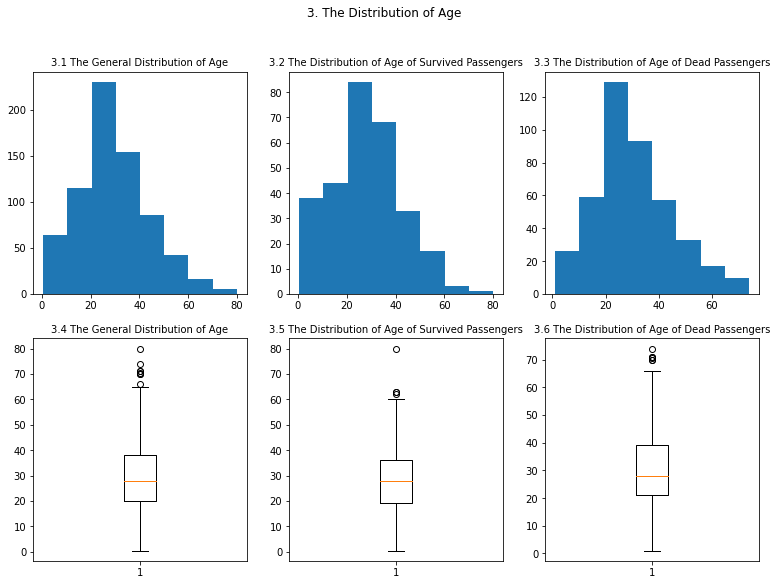

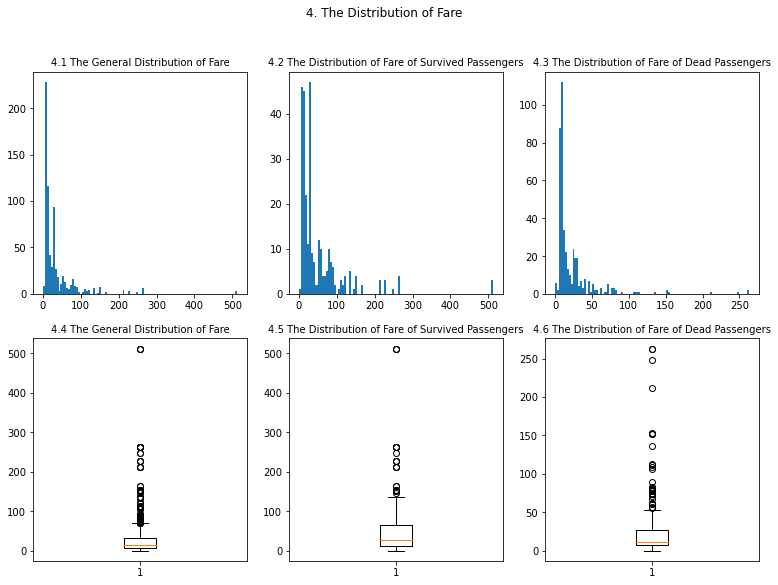

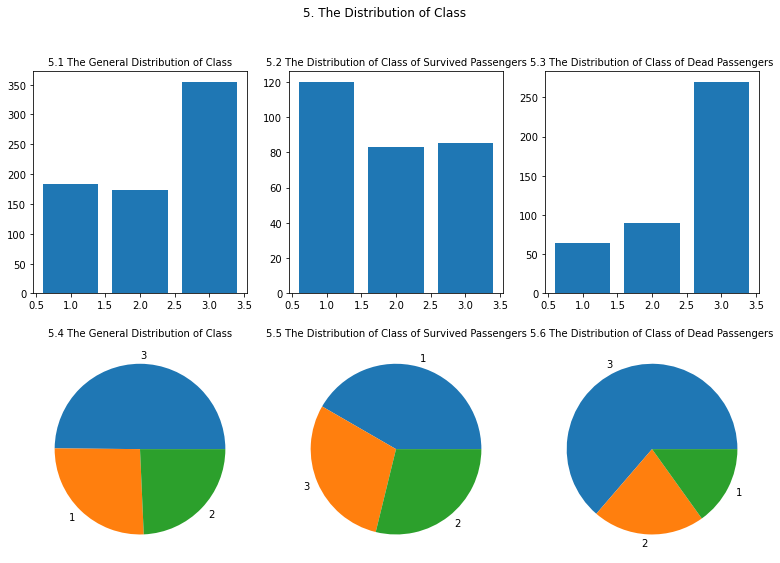

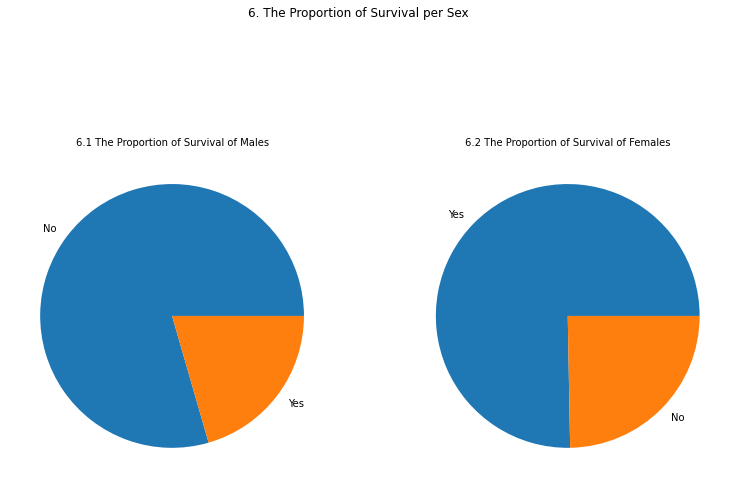

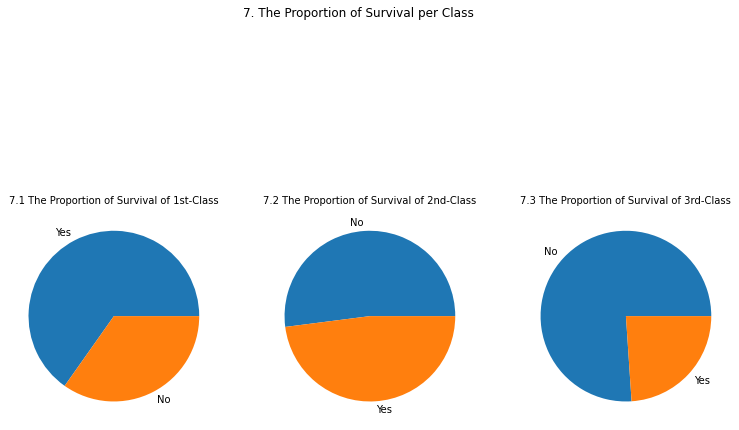

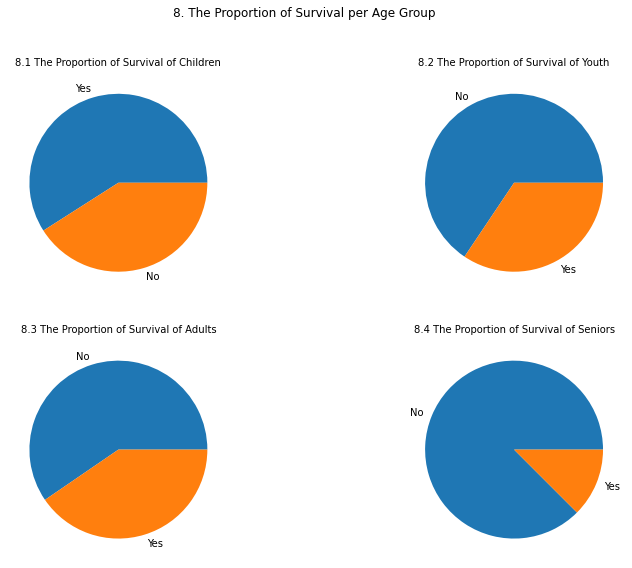

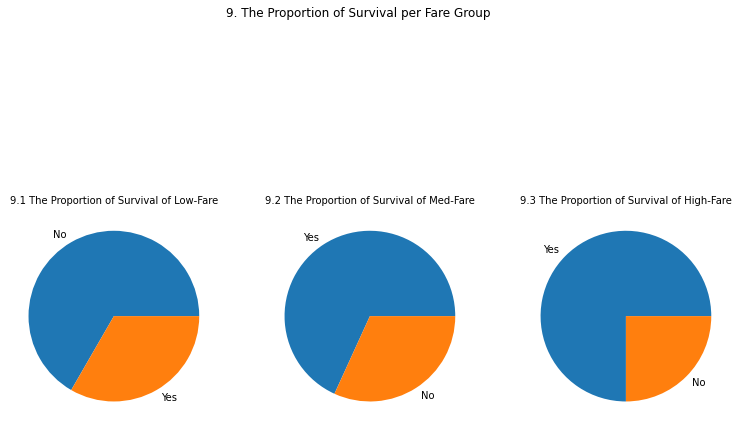

In [1]:
# In this cell we are going to visulise the datasets which will help us understand the
# distribution of the data values within each columns/variables.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

# Data Vis. using Matplotlib only!:

# The distribution of the following cateogorical data/variables can be achieved via bar plots:
# Survived, Sex, SibSp, Parch and Embarked.
# Bar plots will tell us about the frequency of occurance of each catagory for each variable.

# In Matplotlib the bar() method must take two equal arrays as arguments. The x-axis array shall contain the catagories 
# we need to depict using bars. The y-axis array shall contain the numeric value associated with each catagory, which in
# turn will determine the height of the bars in the bar chart.

# Method 1: Bar plots using dictionary value_count():

# The next lines was an initial attempt to prepare the needed arrays for plotting a bar chart for total number of males
# and females in the dataset(i.e. dataframe). This approach utilises the value_counts() method on the sex column of the 
# refined dataframe: newdf. This method will return a (0D) array containing the total number of males and females. The
# index of such array will be the actual names of the catagories: male and female.
# Now we utilise the dict() method and pass it the afromentioned array. This dictionary will contain key-value items.
# Each item will contain the name of the catagory as the key and the numeric count as the value.
# Then we can extract the keys and values of this dictionary and assign each to a seperate variable containg an array.
# Those variables can now be passed to the plt.bar() method.
sex_dict = dict(newdf['Sex'].value_counts())
x_values = sex_dict.keys()
y_values = sex_dict.values()

# Method 2 (a better method): Bar plots using value_count() and the index and values attributes:

# The next lines will simply create an array for each categorical column containing the number of occurences for each
# catagory. Next we will use the index and values attributes and pass those to the plt.bar() method.
sex_array = newdf['Sex'].value_counts()
sur_array = newdf['Survived'].value_counts()
em_array = newdf['Embarked'].value_counts()
fare_array = newdf['Fare'].value_counts()
class_array = newdf['Pclass'].value_counts()

# The next line create an array of survived people only.
survived_ppl = newdf.loc[newdf['Survived'] == "Yes"]

# The next lines will simply create an array for each categorical column containing the number of occurences for each
# catagory, for survived people ONLY. Next we will use the index and values attributes and pass those to the plt.bar() 
# method.
sex_array_sur = survived_ppl['Sex'].value_counts()
sur_array_sur = survived_ppl['Survived'].value_counts()
em_array_sur = survived_ppl['Embarked'].value_counts()
fare_array_sur = survived_ppl['Fare'].value_counts()
class_array_sur = survived_ppl['Pclass'].value_counts()

# The next line create an array of people whom passed away only.
heaven_ppl = newdf.loc[newdf['Survived'] == "No"]

# The next lines will simply create an array for each categorical column containing the number of occurences for each
# catagory, for dead people ONLY. Next we will use the index and values attributes and pass those to the plt.bar() 
# method.
sex_array_h = heaven_ppl['Sex'].value_counts()
sur_array_h = heaven_ppl['Survived'].value_counts()
em_array_h = heaven_ppl['Embarked'].value_counts()
fare_array_h = heaven_ppl['Fare'].value_counts()
class_array_h = heaven_ppl['Pclass'].value_counts()

# The next lines create arrays of males and females.
males = newdf.loc[newdf['Sex'] == "male"]
females = newdf.loc[newdf['Sex'] == "female"]

# The next lines will simply create an array for each categorical column containing the number of occurences for each
# catagory (survived and died), for males and females. Next we will use the index and values attributes and pass those 
# to the plt.bar() method or plt.pie()
males_array = males['Survived'].value_counts()
females_array = females['Survived'].value_counts()

# The next lines create arrays of the dofferent classes.
class1 = newdf.loc[newdf['Pclass'] == 1]
class2 = newdf.loc[newdf['Pclass'] == 2]
class3 = newdf.loc[newdf['Pclass'] == 3]

# The next lines will simply create an array for each categorical column containing the number of occurences for each
# catagory (survived and died), for 1st, 2nd and 3rd classes. Next we will use the index and values attributes and pass 
# those to the plt.bar() method or plt.pie()
class1_array = class1['Survived'].value_counts()
class2_array = class2['Survived'].value_counts()
class3_array = class3['Survived'].value_counts()

# The next lines will simply create an array for each age group.
children = newdf.loc[newdf['Age'] < 16]
# children = newdf[newdf['Age'] < 16]
youth = newdf[(newdf['Age'] >= 16) & (newdf['Age'] <= 25)]
adults = newdf[(newdf['Age'] >= 26) & (newdf['Age'] <= 65)]
seniors = newdf.loc[newdf['Age'] > 65]

# The next lines will simply create an array for each age group containing the number of occurences for (survived and died).
# Next we will use the index and values attributes and pass 
# those to the plt.bar() method or plt.pie()
children_array = children['Survived'].value_counts()
youth_array = youth['Survived'].value_counts()
adults_array = adults['Survived'].value_counts()
seniors_array = seniors['Survived'].value_counts()

# The next lines will simply create an array for each fare group.
low_fare = newdf.loc[newdf['Fare'] < 50]
med_fare = newdf[(newdf['Fare'] >= 50) & (newdf['Fare'] <= 100)]
high_fare = newdf.loc[newdf['Fare'] > 100]

# The next lines will simply create an array for each fare group containing the number of occurences for (survived and died).
# Next we will use the index and values attributes and pass 
# those to the plt.bar() method or plt.pie()
low_fare_array = low_fare['Survived'].value_counts()
med_fare_array = med_fare['Survived'].value_counts()
high_fare_array = high_fare['Survived'].value_counts()


# Now that we have all data prepared we can strat with the visualisation:

# First we set the general size of the plot.
plt.figure(figsize = (13,9))


# Next we use the subplot() method to indicate that we need to plot multiple plots within the main figure. The arguments
# of the subplot() method determine the position of the sub plots to be created.

#plt.bar(x_values, y_values)
#sex_array.plot.bar()

# The sex distribution bar plot:


plt.subplot(2,3,1)
plt.title('1.1 The General Distribution of Sex', fontsize=10)
plt.bar(sex_array.index, sex_array.values) 
plt.subplot(2,3,2)
plt.title('1.2 The Distribution of Sex of Survived Passengers', fontsize=10)
plt.bar(sex_array_sur.index, sex_array_sur.values) 
plt.subplot(2,3,3)
plt.title('1.3 The Distribution of Sex of Dead Passengers', fontsize=10)
plt.bar(sex_array_h.index, sex_array_h.values) 
plt.subplot(2,3,4)
plt.title('1.4 The General Distribution of Sex', fontsize=10)
plt.pie(sex_array.values, labels=sex_array.index )
plt.subplot(2,3,5)
plt.title('1.5 The Distribution of Sex of Survived Passengers', fontsize=10)
plt.pie(sex_array_sur.values, labels=sex_array_sur.index )
plt.subplot(2,3,6)
plt.title('1.6 The Distribution of Sex of Dead Passengers', fontsize=10)
plt.pie(sex_array_h.values, labels=sex_array_h.index )
plt.suptitle('1. The Distribution of Sex')
'''
# The survival distribution bar plot:
plt.subplot(2,3,2)
plt.bar(sur_array.index, sur_array.values) '''
# The emarkment distribution bar plot:
plt.figure(figsize = (13,9))

plt.subplot(2,3,1)
plt.title('2.1 The General Distribution of Embarkment', fontsize=10)
plt.bar(em_array.index, em_array.values)
plt.subplot(2,3,2)
plt.title('2.2 The Distribution of Emb. of Survived Passengers', fontsize=10)
plt.bar(em_array_sur.index, em_array_sur.values) 
plt.subplot(2,3,3)
plt.title('2.3 The Distribution of Emb. of Dead Passengers', fontsize=10)
plt.bar(em_array_h.index, em_array_h.values) 
plt.subplot(2,3,4)
plt.title('2.4 The General Distribution of Embarkment', fontsize=10)
plt.pie(em_array.values, labels=em_array.index )
plt.subplot(2,3,5)
plt.title('2.5 The Distribution of Emb. of Survived Passengers', fontsize=10)
plt.pie(em_array_sur.values, labels=em_array_sur.index )
plt.subplot(2,3,6)
plt.title('2.6 The Distribution of Emb. of Dead Passengers', fontsize=10)
plt.pie(em_array_h.values, labels=em_array_h.index )
plt.suptitle('2. The Distribution of Embarkment')


# Here we use the plt.hist() method to create a histogram for the age column. A histogram plot is more suitable for depicting
# the distribution of age considering it's a continous numeric column/variable. Keeping the bins argument as 8
# seems suitable as each bar width will cover approximately an interval of 10 years.
# The sex distribution bar plot:
plt.figure(figsize = (13,9))

plt.subplot(2,3,1)
plt.title('3.1 The General Distribution of Age', fontsize=10)
plt.hist(newdf["Age"], bins=8)
plt.subplot(2,3,2)
plt.title('3.2 The Distribution of Age of Survived Passengers', fontsize=10)
plt.hist(survived_ppl["Age"], bins=8)
plt.subplot(2,3,3)
plt.title('3.3 The Distribution of Age of Dead Passengers', fontsize=10)
plt.hist(heaven_ppl["Age"], bins=8)
plt.subplot(2,3,4)
plt.title('3.4 The General Distribution of Age', fontsize=10)
plt.boxplot(newdf["Age"])
plt.subplot(2,3,5)
plt.title('3.5 The Distribution of Age of Survived Passengers', fontsize=10)
plt.boxplot(survived_ppl["Age"])
plt.subplot(2,3,6)
plt.title('3.6 The Distribution of Age of Dead Passengers', fontsize=10)
plt.boxplot(heaven_ppl["Age"])
plt.suptitle('3. The Distribution of Age')

# fare
plt.figure(figsize = (13,9))

plt.subplot(2,3,1)
plt.title('4.1 The General Distribution of Fare', fontsize=10)
plt.hist(newdf["Fare"], bins=100)
plt.subplot(2,3,2)
plt.title('4.2 The Distribution of Fare of Survived Passengers', fontsize=10)
plt.hist(survived_ppl["Fare"], bins=100)
plt.subplot(2,3,3)
plt.title('4.3 The Distribution of Fare of Dead Passengers', fontsize=10)
plt.hist(heaven_ppl["Fare"], bins=100)
plt.subplot(2,3,4)
plt.title('4.4 The General Distribution of Fare', fontsize=10)
plt.boxplot(newdf["Fare"])
plt.subplot(2,3,5)
plt.title('4.5 The Distribution of Fare of Survived Passengers', fontsize=10)
plt.boxplot(survived_ppl["Fare"])
plt.subplot(2,3,6)
plt.title('4.6 The Distribution of Fare of Dead Passengers', fontsize=10)
plt.boxplot(heaven_ppl["Fare"])
plt.suptitle('4. The Distribution of Fare')


#plt.hist(newdf["Fare"], bins=100)
#plt.suptitle('Important Distributions')
# class
plt.figure(figsize = (13,9))

plt.subplot(2,3,1)
plt.title('5.1 The General Distribution of Class', fontsize=10)
plt.bar(class_array.index, class_array.values)
plt.subplot(2,3,2)
plt.title('5.2 The Distribution of Class of Survived Passengers', fontsize=10)
plt.bar(class_array_sur.index, class_array_sur.values) 
plt.subplot(2,3,3)
plt.title('5.3 The Distribution of Class of Dead Passengers', fontsize=10)
plt.bar(class_array_h.index, class_array_h.values) 
plt.subplot(2,3,4)
plt.title('5.4 The General Distribution of Class', fontsize=10)
plt.pie(class_array.values, labels=class_array.index )
plt.subplot(2,3,5)
plt.title('5.5 The Distribution of Class of Survived Passengers', fontsize=10)
plt.pie(class_array_sur.values, labels=class_array_sur.index )
plt.subplot(2,3,6)
plt.title('5.6 The Distribution of Class of Dead Passengers', fontsize=10)
plt.pie(class_array_h.values, labels=class_array_h.index )
plt.suptitle('5. The Distribution of Class')

# proportions of survival for each sex
plt.figure(figsize = (13,9))

plt.subplot(1,2,1)
plt.title('6.1 The Proportion of Survival of Males', fontsize=10)
plt.pie(males_array.values, labels= males_array.index )
plt.subplot(1,2,2)
plt.title('6.2 The Proportion of Survival of Females', fontsize=10)
plt.pie(females_array.values, labels= females_array.index )
plt.suptitle('6. The Proportion of Survival per Sex')

# proportions of survival for each class
plt.figure(figsize = (13,9))

plt.subplot(1,3,1)
plt.title('7.1 The Proportion of Survival of 1st-Class', fontsize=10)
plt.pie(class1_array.values, labels= class1_array.index )
plt.subplot(1,3,2)
plt.title('7.2 The Proportion of Survival of 2nd-Class', fontsize=10)
plt.pie(class2_array.values, labels= class2_array.index )
plt.subplot(1,3,3)
plt.title('7.3 The Proportion of Survival of 3rd-Class', fontsize=10)
plt.pie(class3_array.values, labels= class3_array.index )
plt.suptitle('7. The Proportion of Survival per Class')

# proportions of survival for each age group
plt.figure(figsize = (13,9))

plt.subplot(2,2,1)
plt.title('8.1 The Proportion of Survival of Children', fontsize=10)
plt.pie(children_array.values, labels= children_array.index )
plt.subplot(2,2,2)
plt.title('8.2 The Proportion of Survival of Youth', fontsize=10)
plt.pie(youth_array.values, labels= youth_array.index )
plt.subplot(2,2,3)
plt.title('8.3 The Proportion of Survival of Adults', fontsize=10)
plt.pie(adults_array.values, labels= adults_array.index )
plt.subplot(2,2,4)
plt.title('8.4 The Proportion of Survival of Seniors', fontsize=10)
plt.pie(seniors_array.values, labels= seniors_array.index )
plt.suptitle('8. The Proportion of Survival per Age Group')

# proportions of survival for each fare group
plt.figure(figsize = (13,9))

plt.subplot(1,3,1)
plt.title('9.1 The Proportion of Survival of Low-Fare', fontsize=10)
plt.pie(low_fare_array.values, labels= low_fare_array.index )
plt.subplot(1,3,2)
plt.title('9.2 The Proportion of Survival of Med-Fare', fontsize=10)
plt.pie(med_fare_array.values, labels= med_fare_array.index )
plt.subplot(1,3,3)
plt.title('9.3 The Proportion of Survival of High-Fare', fontsize=10)
plt.pie(high_fare_array.values, labels= high_fare_array.index )
plt.suptitle('9. The Proportion of Survival per Fare Group')

plt.show()
#g =sns.FacetGrid(newdf1, col = 'Survived')
#g.map(plt.hist, 'Age', bins=10)
#plt.plot(newdf1['Embarked'].value_counts())
#survived_ppl = newdf1.loc[newdf1['Survived'] == 0]
#yy = survived_ppl['Survived'].value_counts()
#print(survived_ppl.info())
#sns.countplot(x="Sex", data = survived_ppl)
#print(newdf['Parch'].sum())

# Notes about the distribution of sex:

# The titanic had more male passengers than females.
# More females survived the incident, almost double.
# More males died in the incident than females. The male dead passengers are approx. seven times the females.
# But drawing conclusions about the relationship between sex and survival will be more concrete if we look into
# how many people survived among females and males. This is important because someone might suggest that firgure 1.2
# for example, could be biased. This is because if we have more female passengers then this might influence the 
# the survival rate of females. Therefore, figures 6.1 and 6.2 will contribute to sheding light on the relationship
# between sex and survival.
# Figures 6.1 and 6.2 also show that females had higher survival rate. Figure 6.1 shows that most males actually died.
# Figure 6.2 shows that around 75% of females did survive the accident.
# This tells us that females might have been given the priority to use the safety boats


# Notes about the distribution of Embankment:

# Most passengers boarded the titanic from port S.
# The survival rate among the three embankment catagories was consistent with the total number of passengers from each
# port. This is why figures 2.1, 2.2 and 2.3 "look" similar.


# Notes about distribution of Age:

# Figures (3.1-3.6) show that the distribution of age is similar for all passengers, survived passengers and dead
# passengers. Also all of those distributions are to some extent normal distributions. But these plots do not seem 
# to suggest that there is relationship between age and survival. So how about we divide the pasengers into three age 
# groups: children, youth, adults and seniors. And then we will examin the relationship between each age group and 
# survival rate.
# Figure 8.1 shows that slightly more children survived than dead children.
# Figure 8.2 and 8.3 show that approx. two thirds of youth and adult passengers actually died.
# Figure 8.4 shows that the majority of seniors died.
# Therefore, we can conclude that chidren had been given the priority to use the safety boats. Also senior people
# maybe due to the age and health factor had less chances to survive.


# Notes about distribution of Fare:

# from figures 4.1-4.6 we can see that The distribution of fare is skewed to the left and the box plots show alot of
# outliers. This means that only a few passengers paid significantly higher fares. Please have a look at
# Notes about the Fare column/var, in cell 6, for some interesting insights about the fare distribution.
# But doeas paying more lead to higher survival rate? So first lets create three fare groups: low, medium and high.
# Now lets look at the survival rate for each fare group.
# Well figure 9.1 shows that two thirds of low-fare-passengers actually died. Figure 9.2 on the contrary shows that 
# two thirds of the med-fare passengers actually survived. Figure 9.3 shows that around 75% of the high-fare
# passengers actually survived.
# So geberally speaking people paying more did end up surviving the incident.


# Notes about distribution of class:
# figure 5.1 shows that approx. half of the passengers were in the 3rd class, and the rest were equally divided between
# 1st and 2nd classes.
# Neverrtheless, figure 5.3 shows that the majority of passengers belonging from 3rd class died. The numbers of
# 3rd-class dead passengers is signigicantly higher that those from 1st and 2nd classes.







In [224]:
# In this cell we are going to convert categorical columns/variables to numeric via dictionaries(i.e. labelling).
# Then we will use the corr() method to produce a correlation matrix between variables.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

# In case we need to convert categorical data to numeric we can do that via dictionaries because the catgories are a few.
# The following line was utilised to know the catgories of the emarked column.
# print(newdf1['Embarked'].value_counts())
survived_dict = {"Survived":{"Yes":1 , "No":0}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}
newdf1=newdf.replace(embarked_dict)
newdf1=newdf1.replace(survived_dict)
newdf1=newdf1.replace(sex_dict)

display(newdf1.head())
print(newdf1.info())

print(newdf1.corr())




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    int64  
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 66.8+ KB
None
             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.029526 -0.035609  0.024674  0.033681 -0.082704   
Survived        0.029526  1.000000 -0.356462 -0.536762 -0.082446 -0.015523   
Pclass         -0.035609 -0.356462  1.000000  0

In [17]:
# In this cell we are going to convert categorical columns/variables to numeric via hot-encoding.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

# In case we need to convert categorical data to numeric we can do that via hot-encoding as well:

cat_columns = newdf[['Survived', 'Embarked', 'Sex']]
encoded_dataframe = pd.get_dummies(data=cat_columns, columns=['Survived', 'Embarked', 'Sex'])
newdf1 = pd.concat([newdf, encoded_dataframe], axis=1)
newdf1 = newdf1.drop(columns=['Survived', 'Embarked', 'Sex'], axis=1)





display(newdf1.head())
print(newdf1.info())

# print(newdf.corr())



,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Survived_No,Survived_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,343,2,"Collander, Mr. Erik Gustaf",28.0,0,0,248740,13.0000,1,0,0,0,1,0,1
1,76,3,"Moen, Mr. Sigurd Hansen",25.0,0,0,348123,7.6500,1,0,0,0,1,0,1
2,641,3,"Jensen, Mr. Hans Peder",20.0,0,0,350050,7.8542,1,0,0,0,1,0,1
3,568,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29.0,0,4,349909,21.0750,1,0,0,0,1,1,0
4,672,1,"Davidson, Mr. Thornton",31.0,1,0,F.C. 12750,52.0000,1,0,0,0,1,0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   712 non-null    int64  
 1   Pclass        712 non-null    int64  
 2   Name          712 non-null    object 
 3   Age           712 non-null    float64
 4   SibSp         712 non-null    int64  
 5   Parch         712 non-null    int64  
 6   Ticket        712 non-null    object 
 7   Fare          712 non-null    float64
 8   Survived_No   712 non-null    uint8  
 9   Survived_Yes  712 non-null    uint8  
 10  Embarked_C    712 non-null    uint8  
 11  Embarked_Q    712 non-null    uint8  
 12  Embarked_S    712 non-null    uint8  
 13  Sex_female    712 non-null    uint8  
 14  Sex_male      712 non-null    uint8  
dtypes: float64(2), int64(4), object(2), uint8(7)
memory usage: 54.9+ KB
None


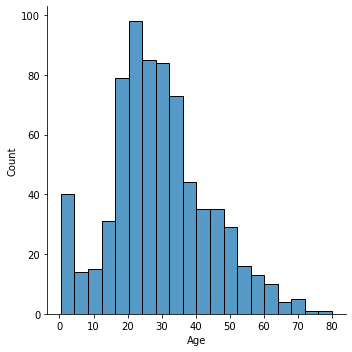

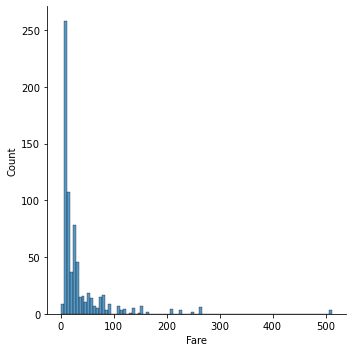

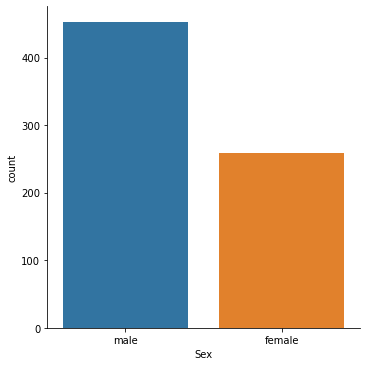

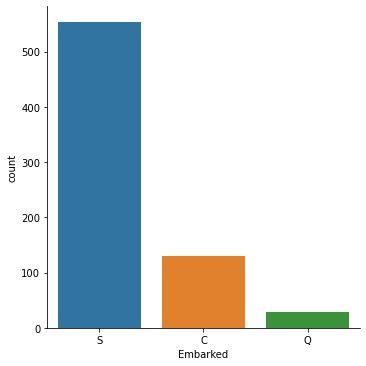

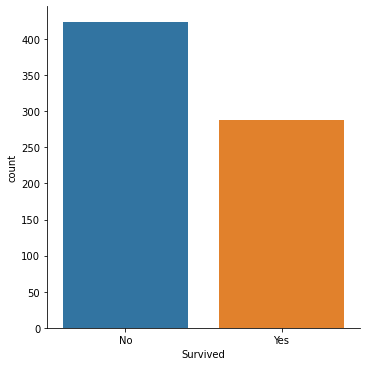

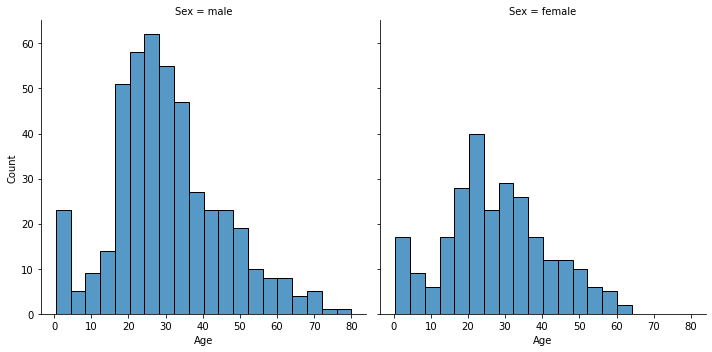

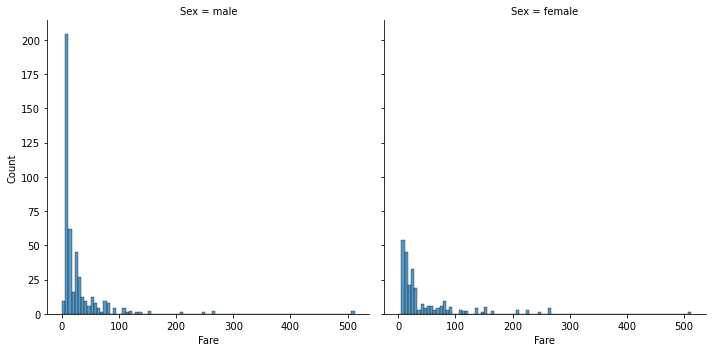

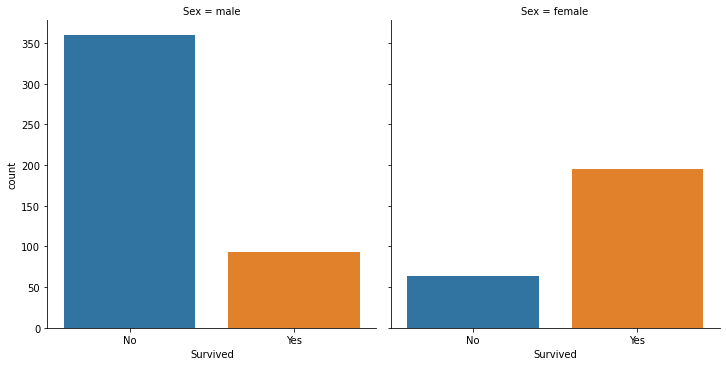

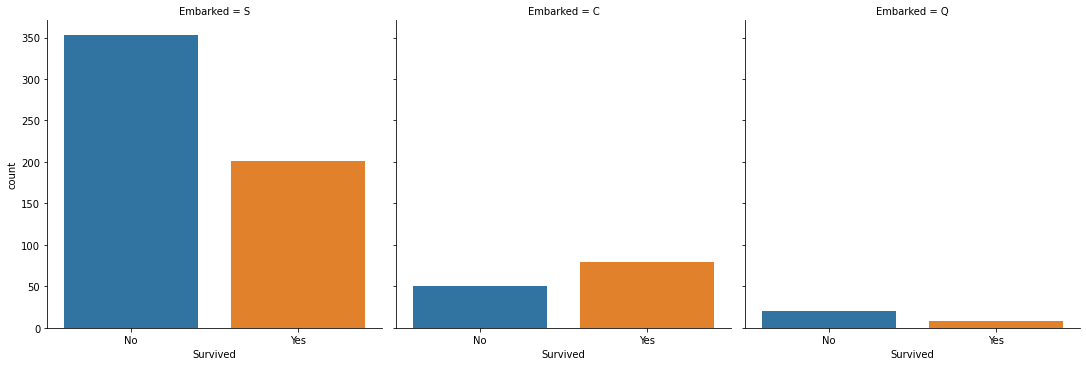

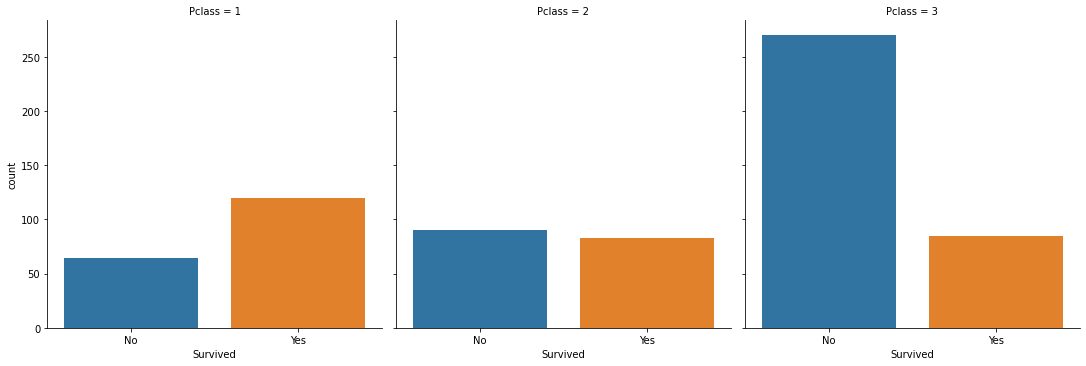

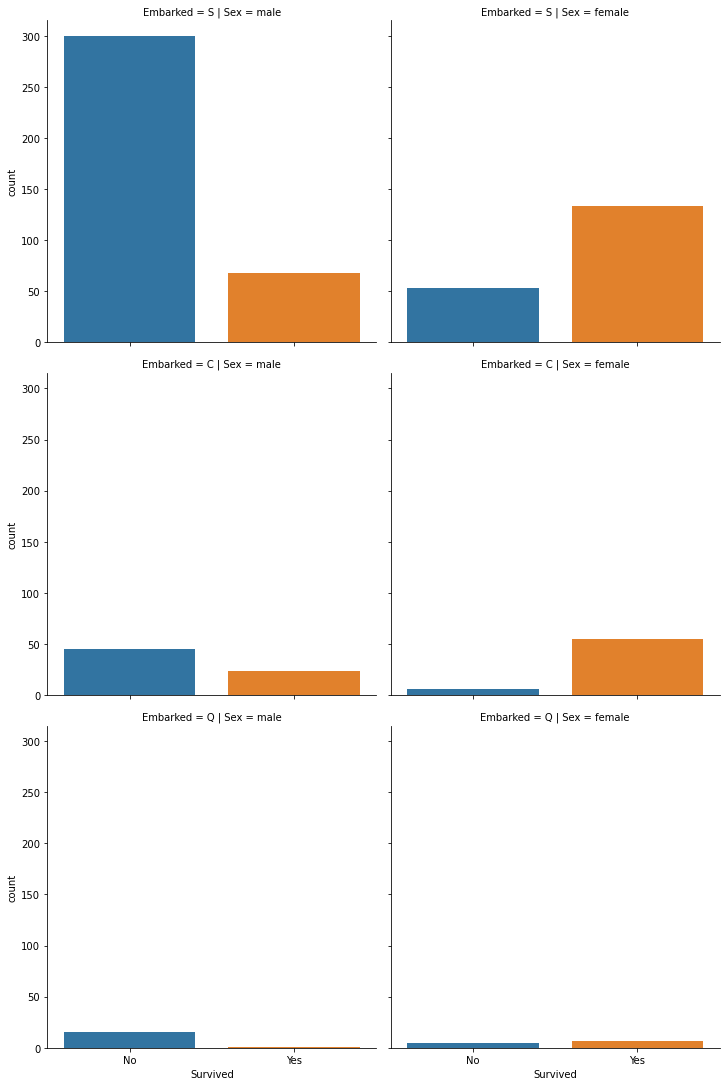

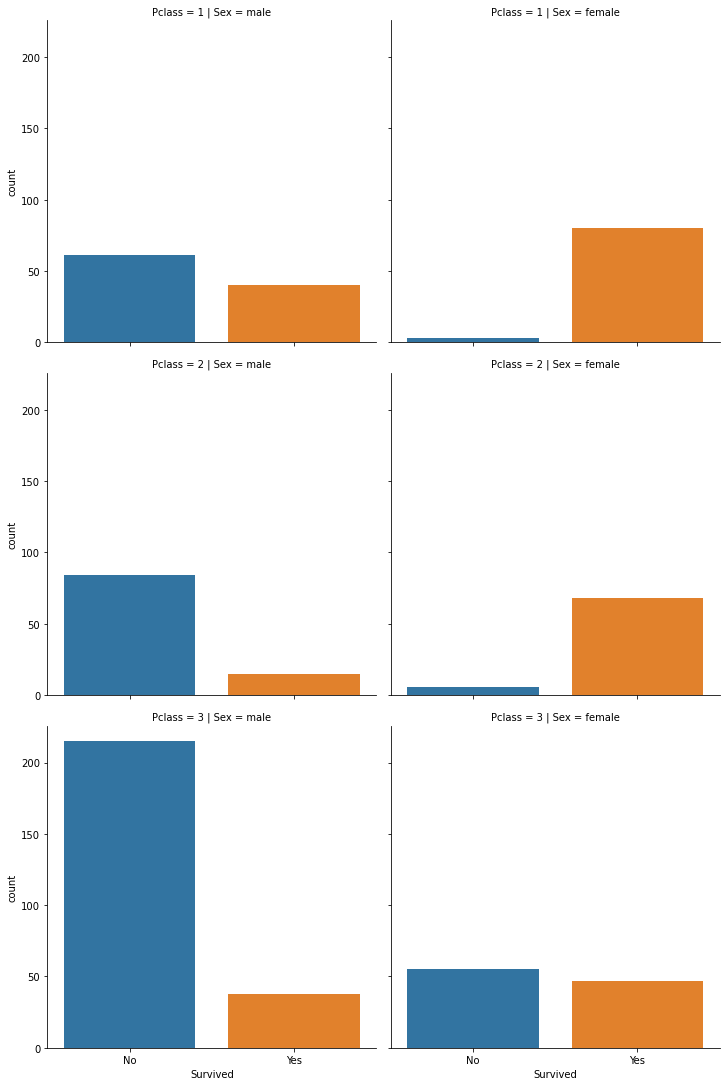

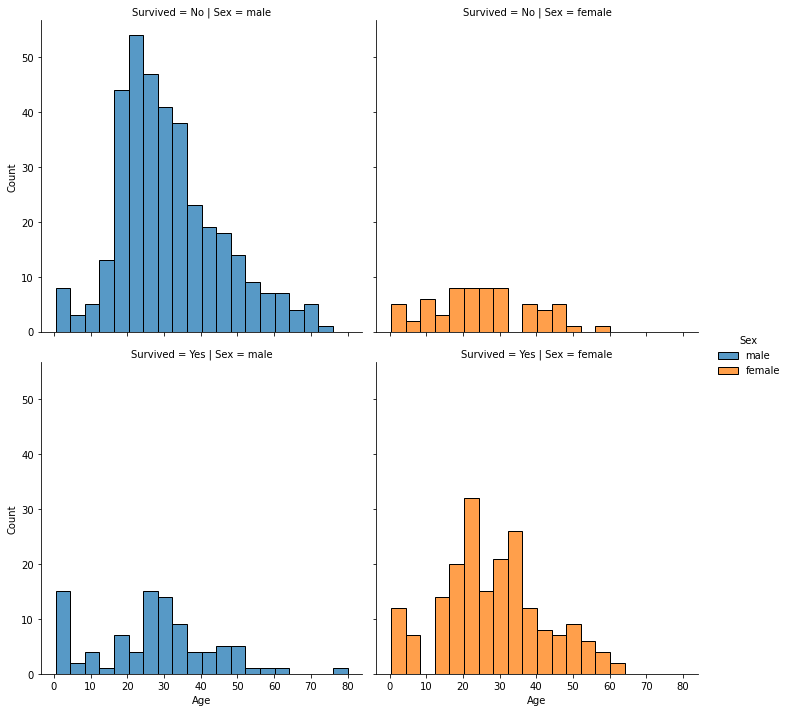

In [47]:
# This cell is all about testing plotting using seaborn.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

# Playing with Data Vis. using Seaborn!
# Those plots were produced using Matplotlib only in a previous cell

# The distribution of important columns/varibles.
sns_Age = sns.displot(x= "Age", data=newdf)
sns_Fare = sns.displot(x= "Fare", data=newdf)
sns_Sex = sns.catplot(x= "Sex", data=newdf, kind="count")
sns_Em = sns.catplot(x= "Embarked", data=newdf, kind="count")
sns_Sur = sns.catplot(x= "Survived", data=newdf, kind="count")



# The distribution of age for each sex.
sns_Age_Sex = sns.displot(x= "Age", col="Sex", data=newdf)

# The distribution of fare for each sex.
sns_Fare_Sex = sns.displot(x= "Fare", col="Sex", data=newdf)

# The distribution of Survival for each sex.
sns_Survived_Sex = sns.catplot(x="Survived" , col="Sex", data=newdf, kind="count")

# The distribution of Survival for each Port.
sns_Survived_Embarked = sns.catplot(x="Survived" , col="Embarked", data=newdf, kind="count")

# The distribution of Survival for each class.
sns_Survived_Pclass = sns.catplot(x="Survived" , col="Pclass", data=newdf, kind="count")

# The distribution of Survival for each sex within each port.
sns_Survived_Sex_Embarked  = sns.catplot(x="Survived" , col="Sex", row ="Embarked", data=newdf, kind="count")

# The distribution of Survival for each sex within each port.
sns_Survived_Sex_class  = sns.catplot(x="Survived" , col="Sex", row ="Pclass", data=newdf, kind="count")

# The distribution of Survival for each sex within each port.
sns_Survived_Sex_class  = sns.displot(x="Age" , col="Sex", row ="Survived", hue="Sex",data=newdf, kind="hist")



# Some experimental plots using seaborn facetgrid function.

# g = sns.FacetGrid(newdf, col="Survived",  row="Sex")
# g.map(sns.histplot, "Age")

# g = sns.FacetGrid(newdf, col="Survived")
# g.map(sns.histplot, "Age")

# g = sns.FacetGrid(newdf, col="Sex")
# g.map(sns.countplot, "Survived")


# g =sns.FacetGrid(newdf, col = 'Survived')
# g.map(plt.hist, 'Age', bins=10)

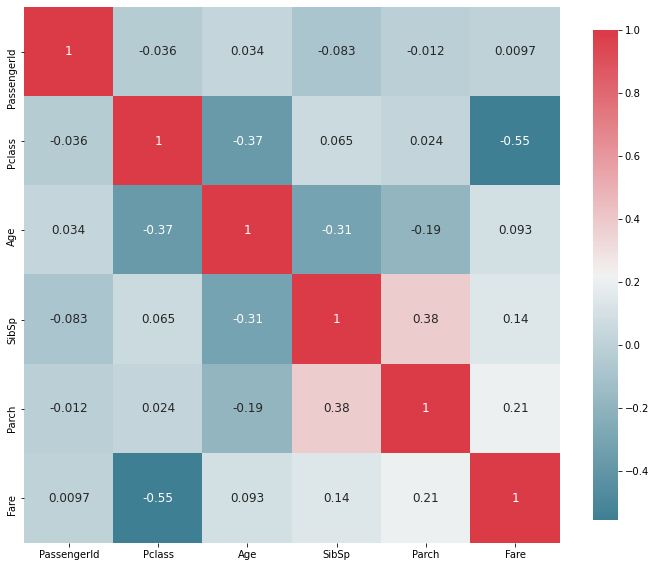

In [45]:
# In this cell we examine a function that creats a sea born heat map of the correlation matrix of all variables.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

def plot_correlation_map( newdf ):

#The corr() method is called on the dataframe newdf, and then stored in the variable corr.
    corr = newdf.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

#The seaborn diverging_palette() method is called to create a "list of colors". Basically the first two arguments
#represent the start and end of this "list of colors". Those arguments are hue values that range from 0 to 360.
#With reference to: https://en.wikipedia.org/wiki/Hue#/media/File:HueScale.svg, we can see the distrobution of the hues
#from 0 to 360. For example, specifying the arguments to 0 and 10 will give us a palette that is predominiately redish.
# setting as_cmap to true means that we will rely on matplotlib to map float values from the corr matrix - that are 
#between 0 and 1, to the corresponding color from the specified palette.
    cmap = sns.diverging_palette(220 , 10 , as_cmap = True )

#Now we can use the seaborn heatmap method to create the heatmap. The first argument is the data itself. cmap require 
#information on how to do the mapping from data values to color space. Since we already craeted that within the cmap var
#then we simply set the cmap argument to be equal to cmap.
    s = sns.heatmap(

        corr, 

        cmap = cmap,
#This is to ensure we produce a heatmap consisting of squares only.
        square=True, 
#This will shrink the color bar by 0.1
        cbar_kws={ 'shrink' : 0.9 }, 

        ax=ax, 
#This will print the corr values on the heatmap
        annot = True, 
#This will set the font size of corr values on the heatmap
        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( newdf ) 

# Looking at the heatmap and using the color bar, we can tell that any "strong" or dark red will represent strong positive
# correlation. Dark blue squares represent strong negative correlation between the variable that interset on that square.
# Lighter colors depict lower correlation. 
# The labels of course provide good indications about the magnitude of the correlation.
# For example, there is some  negative correalation between pclass and fare that is reflected by a darker blue square.
# Actually this kinf of makes sense because as the number in pclass goes up the class becomes less "fancy" and therefore
# the fare goes down and visa versa.

In [51]:
# In this cell we are going to examine the groupby method along with the mean that can reveal more insight
# about the relatioships between the variables in our data.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.drop(['Cabin'],axis=1) 

survived_dict = {"Survived":{"Yes":0 , "No":1}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}
newdf=newdf.replace(embarked_dict)
newdf=newdf.replace(survived_dict)
newdf=newdf.replace(sex_dict)

# survived_ppl = newdf.loc[newdf['Survived'] == 0]
# sns.countplot(x="Sex", data = survived_ppl)

Pclass_Survived = newdf[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()
Survived_Pclass = newdf[["Survived", "Pclass"]].groupby(["Survived"], as_index=True).mean()
Sex_Survived = newdf[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean()
Sex_Age = newdf[["Sex", "Age"]].groupby(["Sex"], as_index=True).mean()
Survived_Age = newdf[["Survived", "Age"]].groupby(["Survived"], as_index=True).mean()
Survived_Sex = newdf[["Survived", "Sex"]].groupby(["Survived"], as_index=True).mean()
Survived_Fare = newdf[["Survived", "Fare"]].groupby(["Survived"], as_index=True).mean()
Survived_Parch = newdf[["Survived", "Parch"]].groupby(["Survived"], as_index=True).mean()
Survived_Embarked = newdf[["Survived", "Embarked"]].groupby(["Survived"], as_index=True).mean()





# The result of the following line showed that the survival mean for 3rd classe passengers "tends" to approach 
# 1 which means that being a 3rd class passenger you are more likely to die. The opposite applies for 1st class 
# passengers.
print(Pclass_Survived)
# The result of the following line showed that the pclass-mean for survivors (encoded with 0) tend to be 
# two, which suggests that 2nd class passengers are more likely to survive.
print(Survived_Pclass)
# The result of the following line showed that the survived-mean for females (encoded with 0) tend to be 
# 0, which suggests that female passengers are more likely to survive. The opposite is true for males.
print(Sex_Survived)
# The result of the following line showed that the average age of females is slightly lower than that for males and
# both of the mean values show that passengers on average are quite young.
print(Sex_Age)
# The result of the following line showed that the average age of survivors is slightly lower than that for dead.
print(Survived_Age)
# The result of the following line showed that the sex-mean for survivors (encoded with 0) tend to be 
# zero, which suggests that female passengers are more likely to survive than males.
print(Survived_Sex)
# The result of the following line does not particularly show anything significant.
print(Survived_Parch)
# The result of the following line showed that the embarked-mean for dead passengers (encoded with 1) tend to be 
# 1, which suggests that passengers embarking from port southhampton
# are more likely to die.
print(Survived_Embarked)



        Survived
Pclass          
1       0.347826
2       0.520231
3       0.760563
            Pclass
Survived          
0         1.878472
1         2.485849
     Survived
Sex          
0    0.247104
1    0.794702
           Age
Sex           
0    27.745174
1    30.726645
                Age
Survived           
0         28.193299
1         30.626179
               Sex
Survived          
0         0.322917
1         0.849057
             Parch
Survived          
0         0.531250
1         0.365566
          Embarked
Survived          
0         0.753472
1         0.926887


In [4]:
# in this cells we craete a new column Title to hold titles extracted from the name column.

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )
newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.dropna(axis=1)
survived_dict = {"Survived":{"Yes":0 , "No":1}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}

Title_Dictionary = {"Title": {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}

newdf1=newdf.replace(embarked_dict)
newdf1=newdf1.replace(survived_dict)
newdf1=newdf1.replace(sex_dict)

#newdf1=newdf1.replace(Title_Dictionary)

# Here we are going to create a new column title, the value of each entry will be extracted from the name col.
# We use Pandas Series.str.extract() function to extratc titles.
# The argument of this function is a regex patter.
# in the regex we used we specify - between square brackets - a range of capital and small letters and space(\s).
# This is actually the part we need to extract, but we must also speify the starting and end charachters. Those are (,)
# and (.).
# The space is only needed in the expression because "the Countess" is the only title with space inside it.
newdf1['Title'] = newdf1['Name'].str.extract(', ([A-Za-z\s]+|)\.')
# print(newdf1[['Title','Name']].head(700).to_string())


<AxesSubplot:title={'center':'The Distribution of Titles among High Fare'}, xlabel='count', ylabel='Title'>

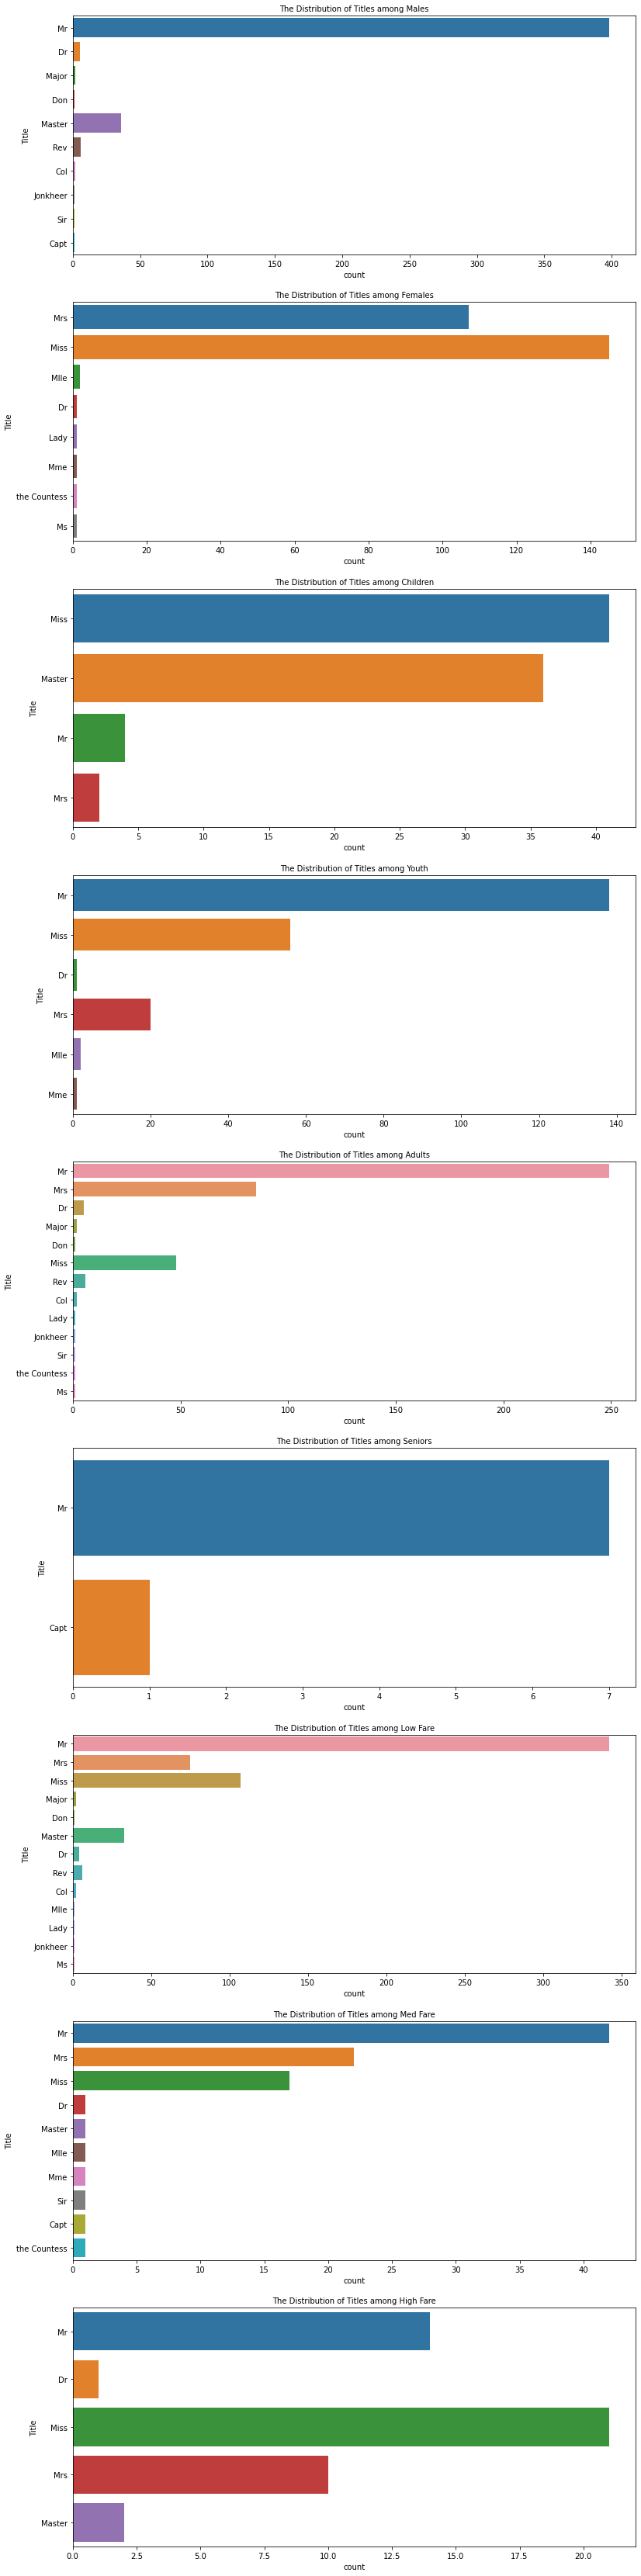

In [5]:
# In this cell we are going to use the newly craeted Title column to reveal any correlation with the other variables
# especially, age, fare and sex.

import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )
newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.dropna(axis=1)
survived_dict = {"Survived":{"Yes":0 , "No":1}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}

Title_Dictionary = {"Title": {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}

newdf1=newdf.replace(embarked_dict)
newdf1=newdf1.replace(survived_dict)
newdf1=newdf1.replace(sex_dict)

# newdf1['Title'] = newdf1['Name'].str.extract('.*\,(.*)\..*')
newdf1['Title'] = newdf1['Name'].str.extract(', ([A-Za-z\s]+|)\.')

#newdf1=newdf1.replace(Title_Dictionary)
# print(newdf1[['Title','Name']].head(700).to_string())

# The next lines will simply create an array for each age group.
children = newdf1.loc[newdf1['Age'] < 16]
# children = newdf[newdf['Age'] < 16]
youth = newdf1[(newdf1['Age'] >= 16) & (newdf1['Age'] <= 25)]
adults = newdf1[(newdf1['Age'] >= 26) & (newdf1['Age'] <= 65)]
seniors = newdf1.loc[newdf1['Age'] > 65]

# The next lines will simply create an array for each fare group.
low_fare = newdf1.loc[newdf1['Fare'] < 50]
med_fare = newdf1[(newdf1['Fare'] >= 50) & (newdf['Fare'] <= 100)]
high_fare = newdf1.loc[newdf1['Fare'] > 100]

# The nest lines will create arrays for each sex.
males = newdf1.loc[newdf1['Sex'] == 1]
females = newdf1.loc[newdf1['Sex'] == 0]
# print(males.head())

# The next lines will create arrays for the counts of each title within each sex.
males_title = males["Title"].value_counts()
females_title = females["Title"].value_counts()
# print(males_title)
# print(females_title)

# Now lets create a corr matrix to make sure we have an overview of the correlation between title any each other var.
# print(newdf1.corr())


#plt.bar(males_title.index, males_title.values)
# Now lets make some plots that could help reveal the relationship between title on one hand and sex, age and fare 
# on the other hand.
plt.figure(figsize = (13,60))

# This figure below, naturally shows a significant number of males holding the title Mr.
# Female-titles like Miss, are of course absent here.
plt.subplot(9,1,1)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Males', fontsize=10)
sns.countplot(y="Title", data = males)

# This figure naturally shows a significant number of females holding the title Mrs. and Miss.
# Female-titles like Mr., are of course absent here.
plt.subplot(9,1,2)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Females', fontsize=10)
sns.countplot(y="Title", data = females)

# This figure below, naturally shows a significant number of male children holding the title Master.
# adult-titles like Mr., Mrs, Dr. and other occupation-related titles are of course absent here.
# There a couple of female "children" holding the title Mrs.
plt.subplot(9,1,3)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Children', fontsize=10)
sns.countplot(y="Title", data = children)

# This figure below, shows a significant number of young people holding the title Mr. 
# That is more than twice when comppared to Miss.
# Occupation-related titles are scarce here. There is only one doctor however.
# More than twice the number of females are single.
plt.subplot(9,1,4)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Youth', fontsize=10)
sns.countplot(y="Title", data = youth)

# This figure below, shows that the  number of males - holding the title Mr.- are considerably higher than females
# holding the titles Miss and Mrs'.
# The number of married females is considerably higher than single females for this age group.
# Occupation-related titles are more in this age group.
plt.subplot(9,1,5)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Adults', fontsize=10)
sns.countplot(y="Title", data = adults)

# The seniors are all man holding the title Mr. except for one Captain.
plt.subplot(9,1,6)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Seniors', fontsize=10)
sns.countplot(y="Title", data = seniors)
# figure.tight_layout()

# The low fare male passengers are significantly more than females.
# There are passengers with royal or proffesional titles who are in the low fare group.
plt.subplot(9,1,7)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Low Fare', fontsize=10)
sns.countplot(y="Title", data = low_fare)

# The number of males and females are tending to be equal.
plt.subplot(9,1,8)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Med Fare', fontsize=10)
sns.countplot(y="Title", data = med_fare)

# A significantly larger number of females are within the high fare group.
plt.subplot(9,1,9)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among High Fare', fontsize=10)
sns.countplot(y="Title", data = high_fare)





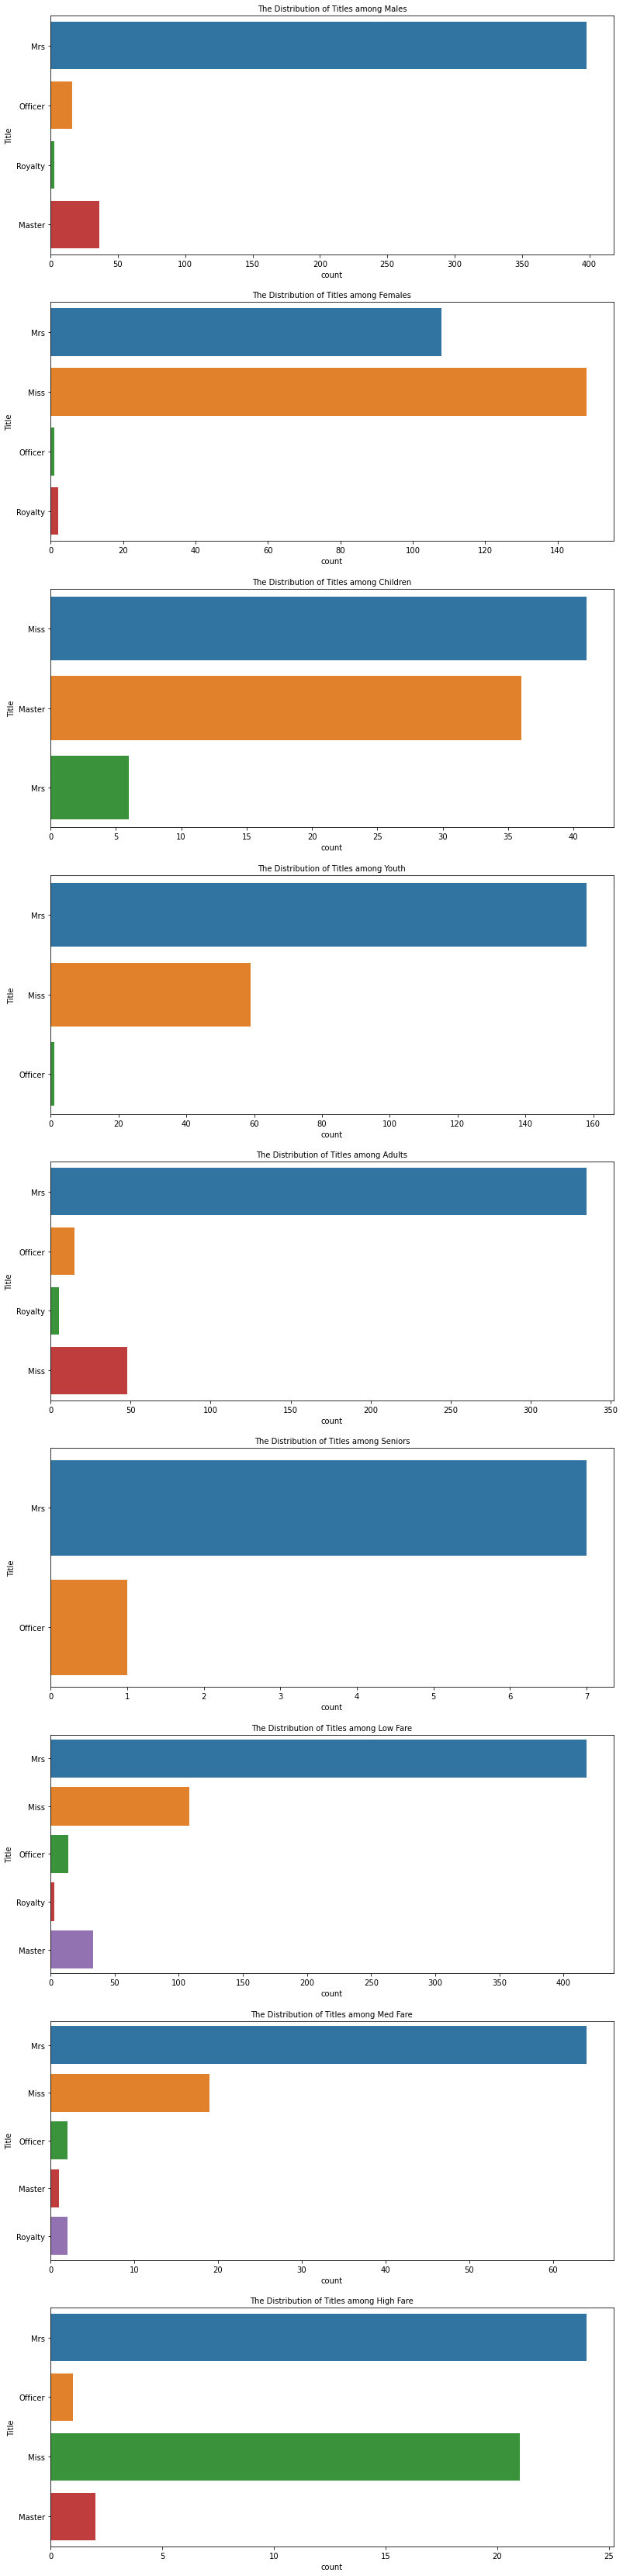

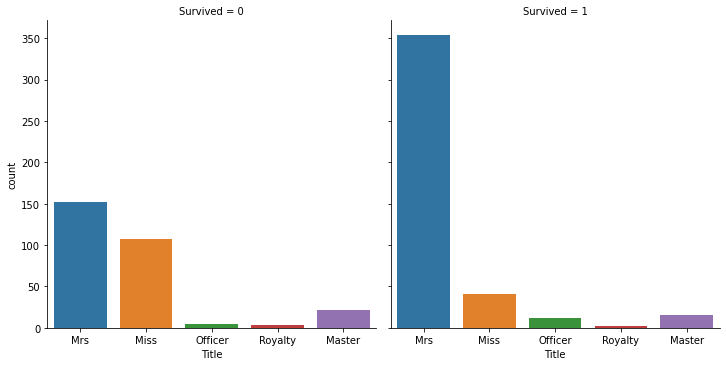

In [38]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )
newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.dropna(axis=1)
survived_dict = {"Survived":{"Yes":0 , "No":1}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}

Title_Dictionary = {"Title": {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}

newdf1=newdf.replace(embarked_dict)
newdf1=newdf1.replace(survived_dict)
newdf1=newdf1.replace(sex_dict)



# newdf1['Title'] = newdf1['Name'].str.extract('.*\,(.*)\..*')
# newdf1['Title'] = newdf1['Name'].str.extract(' ([A-Za-z]+)\.')
# newdf1['Title'] = newdf1['Name'].str.extract(' ([A-Za-z\s]+)\.')
newdf1['Title'] = newdf1['Name'].str.extract(', ([A-Za-z\s]+|)\.')

newdf1=newdf1.replace(Title_Dictionary)

# print(newdf1[['Title','Name']].head(700).to_string())

# The next lines will simply create an array for each age group.
children = newdf1.loc[newdf1['Age'] < 16]
# children = newdf[newdf['Age'] < 16]
youth = newdf1[(newdf1['Age'] >= 16) & (newdf1['Age'] <= 25)]
adults = newdf1[(newdf1['Age'] >= 26) & (newdf1['Age'] <= 65)]
seniors = newdf1.loc[newdf1['Age'] > 65]


# The next lines will simply create an array for each fare group.
low_fare = newdf1.loc[newdf1['Fare'] < 50]
med_fare = newdf1[(newdf1['Fare'] >= 50) & (newdf['Fare'] <= 100)]
high_fare = newdf1.loc[newdf1['Fare'] > 100]


males = newdf1.loc[newdf1['Sex'] == 1]
females = newdf1.loc[newdf1['Sex'] == 0]
# print(males.head())

males_title = males["Title"].value_counts()
females_title = females["Title"].value_counts()
# print(males_title)
# print(females_title)


#plt.bar(males_title.index, males_title.values)

plt.figure(figsize = (13,60))

plt.subplot(9,1,1)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Males', fontsize=10)
sns.countplot(y="Title", data = males)

plt.subplot(9,1,2)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Females', fontsize=10)
sns.countplot(y="Title", data = females)

plt.subplot(9,1,3)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Children', fontsize=10)
sns.countplot(y="Title", data = children)

plt.subplot(9,1,4)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Youth', fontsize=10)
sns.countplot(y="Title", data = youth)

plt.subplot(9,1,5)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Adults', fontsize=10)
sns.countplot(y="Title", data = adults)

plt.subplot(9,1,6)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Seniors', fontsize=10)
sns.countplot(y="Title", data = seniors)
# figure.tight_layout()

plt.subplot(9,1,7)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Low Fare', fontsize=10)
sns.countplot(y="Title", data = low_fare)

plt.subplot(9,1,8)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among Med Fare', fontsize=10)
sns.countplot(y="Title", data = med_fare)

plt.subplot(9,1,9)
# plt.tight_layout(pad=7.0)
plt.title('The Distribution of Titles among High Fare', fontsize=10)
sns.countplot(y="Title", data = high_fare)

sns_Survived_Title = sns.catplot(x="Title" , col="Survived", data=newdf1, kind="count")

# print(newdf1.corr())


             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.029526 -0.035609  0.024674  0.033681 -0.082704   
Survived       -0.029526  1.000000  0.356462  0.536762  0.082446  0.015523   
Pclass         -0.035609  0.356462  1.000000  0.150826 -0.365902  0.065187   
Sex             0.024674  0.536762  0.150826  1.000000  0.099037 -0.106296   
Age             0.033681  0.082446 -0.365902  0.099037  1.000000 -0.307351   
SibSp          -0.082704  0.015523  0.065187 -0.106296 -0.307351  1.000000   
Parch          -0.011672 -0.095265  0.023666 -0.249543 -0.187896  0.383338   
Fare            0.009655 -0.266100 -0.552893 -0.182457  0.093143  0.139860   
Embarked       -0.019164  0.189657  0.297517  0.077391 -0.042340  0.062028   
FamilySize     -0.058545 -0.045068  0.054467 -0.210154 -0.300699  0.847212   

                Parch      Fare  Embarked  FamilySize  
PassengerId -0.011672  0.009655 -0.019164   -0.058545  
Survived    -0.095265 -0.2661

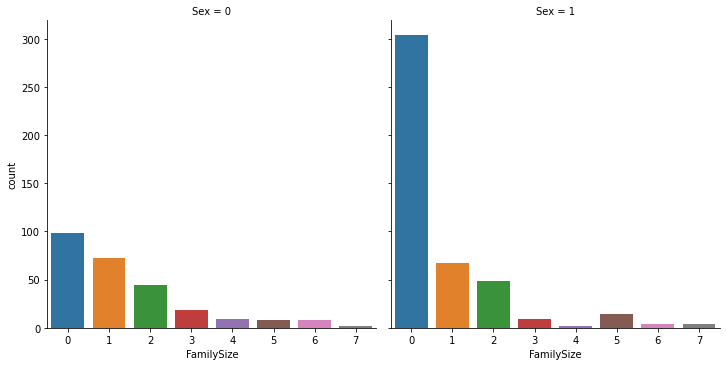

In [42]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )
newdf=df.dropna(subset=['Age','Embarked'])
newdf=newdf.dropna(axis=1)
survived_dict = {"Survived":{"Yes":0 , "No":1}}
embarked_dict = {"Embarked":{"C":0 , "S":1 , "Q":2}}
sex_dict = {"Sex":{"male":1 , "female":0}}

Title_Dictionary = {"Title": {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }}

newdf1=newdf.replace(embarked_dict)
newdf1=newdf1.replace(survived_dict)
newdf1=newdf1.replace(sex_dict)



# newdf1['Title'] = newdf1['Name'].str.extract('.*\,(.*)\..*')
newdf1['Title'] = newdf1['Name'].str.extract(', ([A-Za-z\s]+|)\.')

newdf1=newdf1.replace(Title_Dictionary)

newdf1['FamilySize'] = newdf1['Parch']+newdf1['SibSp']

# print(newdf1[['Title','Name','Parch','SibSp','FamilySize']].head(70).to_string())

# The next lines will simply create an array for passengers with zero family and passengers with more than zero.
no_family = newdf1[(newdf1['FamilySize'] == 0)]
yes_family = newdf1.loc[newdf1['FamilySize'] > 0]

print(newdf1.corr())

# The distribution of familysize within all passengers.
# The following plot indicates that almost half of the passengers in the dataset are actually travelling alone.
sns_FamilySize = sns.catplot(x="FamilySize" ,  data=newdf1, kind="count")

# The distribution of familysize among survivors and dead.
# The following plot shows that the largest number of survivors and dead passengers were travelling alone.
# But such outcome can be traced back to the fact that almost half of the passengers in the dataset are 
# actually travelling alone.
# Neverthless when we compare the numbers of dead passenegrs to between each familysize group we notice that the number
# of dead passengers with zero family memebers, is siginificantly higher than the other dead passengers.
# A stronger evidence of the correlation between family size and survival can be revealed when we look at number of
# survivors and dead passengers inside each familysize group. So lets do that in the next plot.
sns_Survived_FamilySize = sns.catplot(x="FamilySize" , col="Survived", data=newdf1, kind="count")

# The distribution of survival among familysize groups.
# It becomes obvious from the next plot that the familysize group with zero members represents an exceptional case
# where the number of dead passengers is alomost twice as the survivors.
# This can be attributed to the fact that moast if not all passengers travelling alone are actually males and therefore
# were not given the periority to use the emergency boats.
# In fact lets examin the proportion of sex within passengers travellign alone in the upcoming plot.
sns_Survived_FamilySize = sns.catplot(x="Survived" , row="FamilySize", data=newdf1, kind="count")

# The distribution of familysize for each sex.
# The outcome of this plot confirmed our theory that most lonely passengers are in fact males.
sns_FamilySize_sex = sns.catplot(x="FamilySize" , col="Sex", data=newdf1, kind="count")


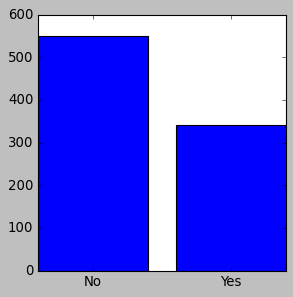

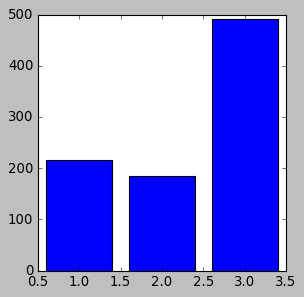

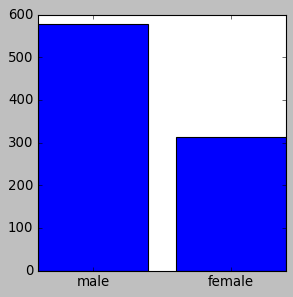

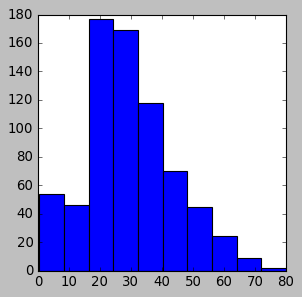

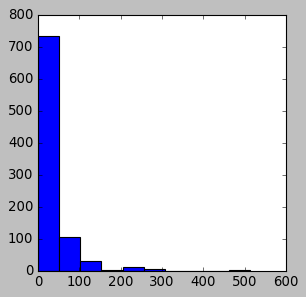

In [48]:
# In this cell we do some bonus work where we create an interface for a simple application that reads csv file and
# privdes options for plotting the variables within the dataset.

# Notes:
# This application works best for the titanic csv file.
# This is because it assumes a delimetre of ;.
# Also it will plot cat. variables if it contains less than 10 subtypes.
# Also if integer columns can be classified into less than 10 subtypes then it will be plotted.
# For integer and object variables that meet the above conditions a bar plot will be plotted.
# For float variables a histogram will be plotted.
# While this application is suitable for the titanic file it might face shortcomings with other datasets.
# This because this code seperates variables according to data type. The float data type are assumed to be 
# continous numeric variable that will be plotted via histogram. The integer data type it has less than 10 
# subtypes then it we be treated as if it is categorical variable that will be plotted via bar plot. Now
# problem arises when numeric data types are mixed between integer and float in other datasets.
# Object columns if it is less than 10 subtypes will be plotted via bar plot. This is because if we have more than 10
# subtypes it will be hard to produce a nice looking plot.

from tkinter import *
from tkinter import filedialog as tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import style

root = Tk()
root.geometry("365x390")

# mylabel = Label(root, text="1- Select CSV File", bg="black", fg="white", padx=5, pady=5, width=50)
# mylabel.grid(row=0, column=0)

def selectfile():
    filepath = tk.askopenfilename()
#     mylabela = Label(root, text="The file path is " + filepath).grid(row=1, column=0)
    df = pd.read_csv (filepath,sep=';' )
#     mylabelb = Label(root, text=df).pack()
    dtypesindexlist = df.dtypes
#     dtypesvalueslist = df.dtypes
    newdf = dtypesindexlist.loc[dtypesindexlist.values == "int64"]
    newdf1 = dtypesindexlist.loc[dtypesindexlist.values == "float64"]
    newdf2 = dtypesindexlist.loc[dtypesindexlist.values == "object"]
    def printselection(value):
#         Label(root, text=value).grid(row=5, column=0)
        
        columnname = value
        if df[columnname].dtypes == "float64":
         style.use('classic')   
         figure = plt.figure(figsize = (4,4))
         plt.hist(df[columnname])
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)
            
        elif df[columnname].dtypes == "int64" and len(df[columnname].value_counts()) < 10 :
         selected_array = df[value].value_counts()
         style.use('classic')
         figure = plt.figure(figsize = (4,4))
         plt.bar(selected_array.index, selected_array.values)
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)   
        
        elif df[columnname].dtypes == "object" and len(df[columnname].value_counts()) < 10 :
         selected_array = df[value].value_counts()
         style.use('classic')
         figure = plt.figure(figsize = (4,4))
         plt.bar(selected_array.index, selected_array.values)
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)      
        
        else:
         mylabel = Label(root, text = "Unable to plot data")   
         mylabel.grid(row=6, column=0)
        
        
   
    clicked = StringVar()
    clicked.set("Choose Column")
    drop = OptionMenu(root, clicked, *dtypesindexlist.index, command = printselection)
    drop.grid(row=3, column=0, sticky="ew")
#     selection = clicked.get()
    

    
#     drop.add_command(root, clicked, *dtypesindexlist.index)
#     drop.options.append(root, clicked, *dtypesindexlist.index)
#     dummy.append(list(dtypesindexlist))

#     for choice in dtypesindexlist:
#         drop.add_command(label=choice, command=tk._setit(clicked, choice))
    
mybuttona = Button(root, text="Click to Select a File", padx=3, pady=3, width=50, command=selectfile, bg="black", fg="white")
mybuttona.grid(row=2, column=0)

# clicked2 = StringVar()
# clicked2.set("Choose Plot")
# plots=["Histogram", "Bar Chart"]
# drop = OptionMenu(root, clicked2, *plots)
# drop.grid(row=4, column=0, sticky="ew")
    
# clicked = StringVar()
# clicked.set("nn")
# dummy = ['']
# drop = OptionMenu(root, clicked, *dummy)
# drop.pack()






# df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

mainloop()

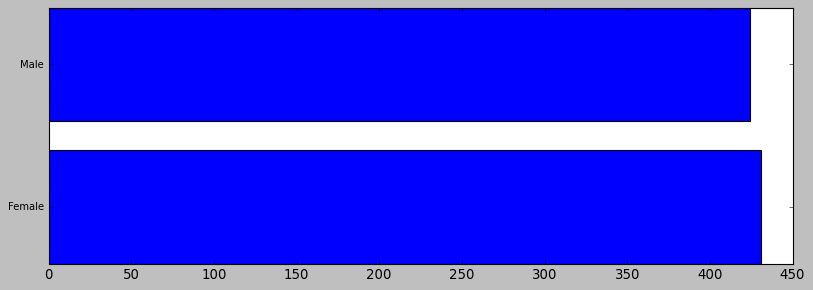

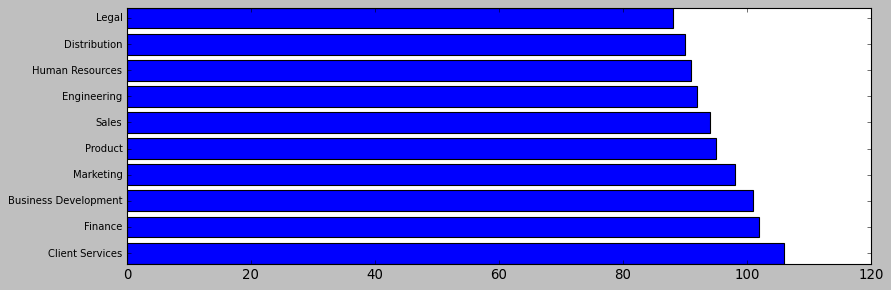

In [49]:
# In this cell we do some bonus work where we create an interface for a simple application that reads csv file and
# privdes options for plotting the variables within the dataset.
# This application is slightly different that the above.
# Try using the Employees dataset with this version.
# I am too tired to explain the changes i made in this application.....maybe later...

from tkinter import *
from tkinter import filedialog as tk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib import style


root = Tk()
root.geometry("960x380")
# root.geometry("600x390")

# mylabel = Label(root, text="1- Select CSV File", bg="black", fg="white", padx=5, pady=5, width=50)
# mylabel.grid(row=0, column=0)

def selectfile():
    filepath = tk.askopenfilename()
#     mylabela = Label(root, text="The file path is " + filepath).grid(row=1, column=0)
    df = pd.read_csv (filepath,sep=',' )
#     mylabelb = Label(root, text=df).pack()
    dtypesindexlist = df.dtypes
#     dtypesvalueslist = df.dtypes
    newdf = dtypesindexlist.loc[dtypesindexlist.values == "int64"]
    newdf1 = dtypesindexlist.loc[dtypesindexlist.values == "float64"]
    newdf2 = dtypesindexlist.loc[dtypesindexlist.values == "object"]
    def printselection(value):
#         Label(root, text=value).grid(row=5, column=0)
        
        columnname = value
        if df[columnname].dtypes == "float64":
         style.use('classic')   
         figure = plt.figure(figsize = (12,4))
         plt.hist(df[columnname])
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)
            
        elif df[columnname].dtypes == "int64" and len(df[columnname].value_counts()) < 10 :
         selected_array = df[value].value_counts()
         style.use('classic')
         figure = plt.figure(figsize = (12,4))
         plt.bar(selected_array.index, selected_array.values)
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)   
            
                        
        elif df[columnname].dtypes == "int64" and len(df[columnname].value_counts()) >= 10 :
#          selected_array = df[value].value_counts()
         style.use('classic')
         figure = plt.figure(figsize = (12,4))
         plt.hist(df[columnname])
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0) 
        
        elif df[columnname].dtypes == "object" and len(df[columnname].value_counts()) < 20 :
         selected_array = df[value].value_counts()
         style.use('classic')
#          fig, ax = plt.subplots()
         figure = plt.figure(figsize = (12,4))
         plt.barh(selected_array.index, selected_array.values)
#          plt.xticks(rotation=90)
#          ax.legend()
         plt.yticks(fontsize=9)
         chart = FigureCanvasTkAgg(figure, root)
         chart.get_tk_widget().grid(row=6, column=0)      
        
        else:
         mylabel = Label(root, text = "Unable to plot data")   
         mylabel.grid(row=6, column=0)
        
        
   
    clicked = StringVar()
    clicked.set("Choose Column")
    drop = OptionMenu(root, clicked, *dtypesindexlist.index, command = printselection)
    drop.config(width=135)
    drop.grid(row=3, column=0, sticky="ew")
#     selection = clicked.get()
    

    
#     drop.add_command(root, clicked, *dtypesindexlist.index)
#     drop.options.append(root, clicked, *dtypesindexlist.index)
#     dummy.append(list(dtypesindexlist))

#     for choice in dtypesindexlist:
#         drop.add_command(label=choice, command=tk._setit(clicked, choice))
    
mybuttona = Button(root, text="Click to Select a File", padx=3, pady=3, width=135, command=selectfile, bg="black", fg="white")
mybuttona.grid(row=2, column=0)

# clicked2 = StringVar()
# clicked2.set("Choose Plot")
# plots=["Histogram", "Bar Chart"]
# drop = OptionMenu(root, clicked2, *plots)
# drop.grid(row=4, column=0, sticky="ew")
    
# clicked = StringVar()
# clicked.set("nn")
# dummy = ['']
# drop = OptionMenu(root, clicked, *dummy)
# drop.pack()






# df = pd.read_csv ('titanic-passengers_again.csv',sep=';' )

mainloop()